In [45]:
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib notebook
%matplotlib inline

In [33]:
df = pd.read_csv("../../../Data/min_SLM_SLQ_NQmDintoCQ_SLY_SLD_cleaned_created_resolved.csv",encoding='latin-1',low_memory=False)

In [36]:
def get_day_into_year(date):
    day_into_year = date.timetuple().tm_yday
    return day_into_year
df["ResolvedDate"] = pd.to_datetime(df["ResolvedDate"])
df["ResolvedDate_Days_into_year"] = df["ResolvedDate"].apply(lambda x: int(get_day_into_year(x)))
df["Created_On"] = pd.to_datetime(df["Created_On"])
df["Created_on_Days_into_year"] = df["Created_On"].apply(lambda x: int(get_day_into_year(x)))

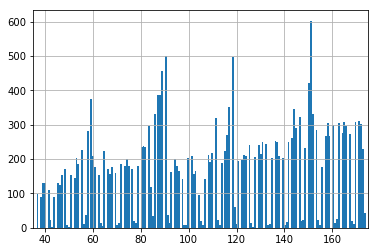

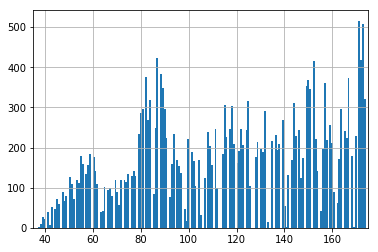

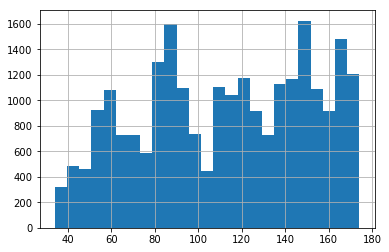

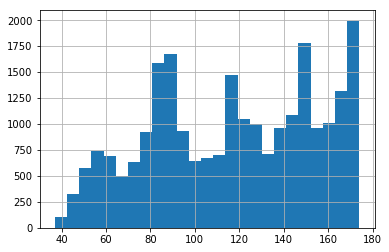

In [49]:
df["Created_on_Days_into_year"].hist(bins=180)
plt.xlim(35, 175)
plt.show()
df["ResolvedDate_Days_into_year"].hist(bins=180)
plt.xlim(35, 175)
plt.show()

df["Created_on_Days_into_year"].hist(bins=25)
# plt.xlim(35, 175)
plt.show()
df["ResolvedDate_Days_into_year"].hist(bins=25)
# plt.xlim(35, 175)
plt.show()

If cases don't get created or resolved on weekends, then we would expect the time taken to be larger if a case was created on weekend.

So, counting from monday, as the day of the week gets larger we would expect the time taken to be larger?

Or, have a marker for whether the case was created on the weekend!

In [60]:
def get_last_bdays_months():
    last_bdays = pd.date_range("2017.01.01", periods=11, freq='BM')
    last_bdays_offset = []
    for last_bday in last_bdays:
        last_bdays_offset.append((last_bday + pd.DateOffset(days=1,hours=8)).date())
    return last_bdays_offset

def created_on_weekend(date, last_bdays):
    day_of_the_week = date.weekday()
    if day_of_the_week == 0 or day_of_the_week == 6:
        # but have to check if the date is the day after last business day of the month!
        if date.date in last_bdays and date.time()>8:
            return 0
        else:
            return 1
    else:
        return 0
last_bdays = get_last_bdays_months()
print(last_bdays)
df["Created_On"] = pd.to_datetime(df["Created_On"])
df["Created_on_weekend"] = df["Created_On"].apply(lambda x: int(created_on_weekend(x, last_bdays)))

[datetime.date(2017, 2, 1), datetime.date(2017, 3, 1), datetime.date(2017, 4, 1), datetime.date(2017, 4, 29), datetime.date(2017, 6, 1), datetime.date(2017, 7, 1), datetime.date(2017, 8, 1), datetime.date(2017, 9, 1), datetime.date(2017, 9, 30), datetime.date(2017, 11, 1), datetime.date(2017, 12, 1)]


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

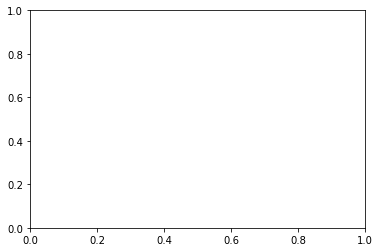

In [61]:
plt.boxplot(df["Created_on_weekend"], df["TimeTaken"])
plt.show()